# Data Visualization Part 2: Student Project
## Matriculation Number: 12200983
## Email ID: raviteja.anumula-naga@stud.th-deg.de
## Name: AUNUMULA NAGA RAVITEJA

The final project consists of a visualization and a text exercise. For this project you need to:

* perform all exercises in a Jupyter notebook
* write Python code to visualize the given data
* comment your code to describe what your code does
* recreate the example figures
* export the final notebook to an html and upload it to iLearn
* don't forget to add your matriculation number to the Jupyter notebook

## 1: Visualization Exercise 1
Here, three alternative visualizations of the same artificial data shall be created by you. All plots display fictitious genomic annotations together with fictitious RNA binding protein data. The visualizations shall display RNA binding protein signals and link these binding information to genomic annotations to shed light on potential biological function. For each version a reference is shown. Two different datasets are provided:

* 10_project_data_annotations.csv
* 10_project_data_signals.csv

The 10_project_data_annotations.csv file contains fictitious genomic information as visualized in all bottom panels of the example plots. Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

10_project_data_signals.csv contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).

In [1]:
# Importing the required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1.1: Version 1

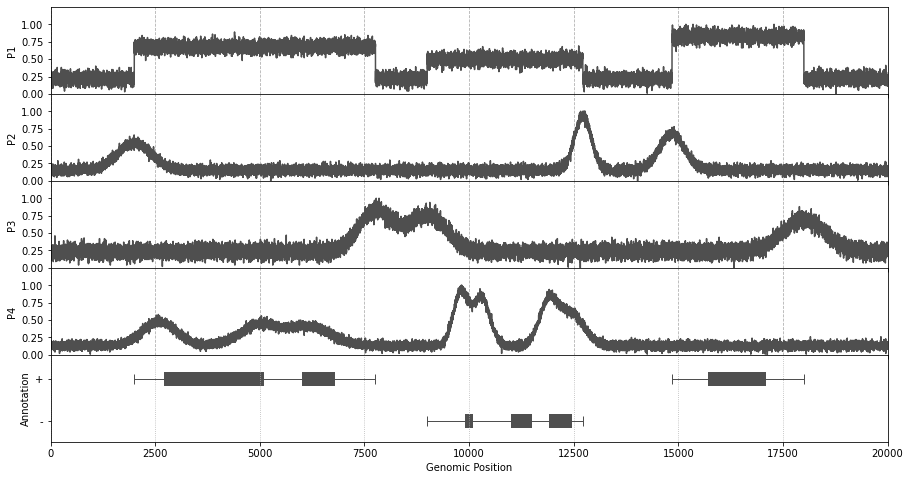

In [2]:
#Import Annotation CSV file
Genome = pd.read_csv('10_project_data_annotation.csv')

#Import RNA Biniding Protein
Protein = pd.read_csv('10_project_data_signals.csv')

#set x axis range
t = np.arange(0, 20000, 1)

fig, axs = plt.subplots(5, 1, sharex=True)
#Set the fig size and Remove horizontal space between axes
fig.set_size_inches(15,8)
fig.subplots_adjust(hspace=0)

#initialize i to 0 as the value of the first subplot
i = 0

#Plot Protein data in different subplots
for P in Protein.columns:
    axs[i].plot(t, Protein[[P]], color='#4f4f4f')
    axs[i].set_xlim(0, 20000)
    axs[i].set_yticks(np.arange(0.0, 1.25, 0.25))   #set y-axis in incremental step points
    axs[i].set_ylim(0, 1.25)                        #set y-axis limit
    axs[i].xaxis.grid(linestyle='--')               #vertical grid line style
    axs[i].set_ylabel(P)                            #set y-axis label
    i += 1                                          #increment i to move to next subplot


#Creating seperate list for Transcript
onlyTranscript = Genome[Genome['type'].str.contains('transcript')]

#Calculating Difference of Start and Stop to plot broken bars
Genome['diff'] = Genome['stop'] - Genome['start']  

#Creating seperate list for Exon
onlyExon = Genome[Genome['type'].str.contains('exon')]

#Plotting Genome data
#Transcript Plot
for rows in range(len(onlyTranscript)):
#check if Strand is '+' the choose y-axis setpoint for strand as 0.9 & for '-' y = 0.3    
    if onlyTranscript.iloc[rows,4] == '+':  
        y = 0.9
    elif onlyTranscript.iloc[rows,4] == '-':
        y = 0.3
    verts = [(onlyTranscript.iloc[rows,2], y), (onlyTranscript.iloc[rows,3], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='#4f4f4f', ms=10)
    
axs[i].set_ylim(0, 1.25)                 # y-axis Limits
axs[i].set_xlim(0, 20000)                # x-axis Limits
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label 5th plot
axs[i].set_yticks([0.3, 0.9])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':')         # vertical grid line style

# Exon Plot
for rows in range(len(onlyExon)):
    if onlyExon.iloc[rows,4] == '+':
        y = 0.8         #set y-axis point from where the bar fills for + strand
        height = 0.2    #set thickness of bar for 0.2 units
    elif onlyExon.iloc[rows,4] == '-':
        y = 0.2         #set y-axis point from where the bar fills for - Strand
        height = 0.2    #set thickness of bar for 0.2 units
    axs[i].broken_barh([(onlyExon.iloc[rows,2], onlyExon.iloc[rows,5])], (y, height), facecolors='#4f4f4f')

plt.show()

### 1.2: Version 2

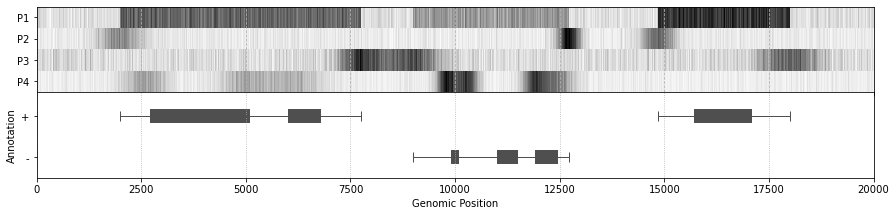

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True)
#Set the fig size and Remove horizontal space between axes
fig.set_size_inches(15,3.15)
fig.subplots_adjust(hspace=0)


#Reorder Coloumns in RNA Binding Data to P4, P3, P2, P1 so that we plot in reverse order
Protein2 = Protein[['P4', 'P3', 'P2', 'P1']]

Protein2 = np.transpose(Protein2) #Transpose Protein Strands so that it matches the dimensions while using pcolormesh

x = np.arange(-0.5, 20000, 1)  # length = 20001
y = np.arange(-0.5, 4.5, 1)  # length = 5

#Plot the data in different subplots
axs[0].pcolormesh(x, y, Protein2, cmap='Greys')    # Plot color map
axs[0].set_yticks([0.0, 1.0, 2.0, 3.0])            # y-axis set points as P1, P2, P3 and P4
axs[0].set_yticklabels(['P4', 'P3', 'P2', 'P1'])   # y-axis labels
axs[0].xaxis.grid(linestyle='--')


#Plotting Genome data
#Transcript Plot
for rows in range(len(onlyTranscript)):
#check if Strand is '+' the choose y-axis setpoint for strand as 0.9 & for '-' y = 0.3    
    if onlyTranscript.iloc[rows,4] == '+':  
        y = 0.9
    elif onlyTranscript.iloc[rows,4] == '-':
        y = 0.3
    verts = [(onlyTranscript.iloc[rows,2], y), (onlyTranscript.iloc[rows,3], y)]
    xs, ys = zip(*verts)
    axs[1].plot(xs, ys, '|-', lw=1, color='#4f4f4f', ms=10)
    
axs[1].set_ylim(0, 1.25)                 # y-axis Limits
axs[1].set_xlim(0, 20000)                # x-axis Limits
axs[1].set_xlabel('Genomic Position')    # x-axis label
axs[1].set_ylabel('Annotation')          # y-axis label 2nd Plot
axs[1].set_yticks([0.3, 0.9])            # y-axis set points for strands + and -
axs[1].set_yticklabels(['-', '+'])       # y-axis labels
axs[1].xaxis.grid(linestyle=':')         # vertical grid line style

# Exon Plot
for rows in range(len(onlyExon)):
    if onlyExon.iloc[rows,4] == '+':
        y = 0.8         #set y-axis point from where the bar fills for + Strand
        height = 0.2    #set thickness of bar for 0.2 units
    elif onlyExon.iloc[rows,4] == '-':
        y = 0.2         #set y-axis point from where the bar fills for - Strand
        height = 0.2    #set thickness of bar for 0.2 units
    axs[1].broken_barh([(onlyExon.iloc[rows,2], onlyExon.iloc[rows,5])], (y, height), facecolors='#4f4f4f')

plt.show()

### 1.3: Version 3

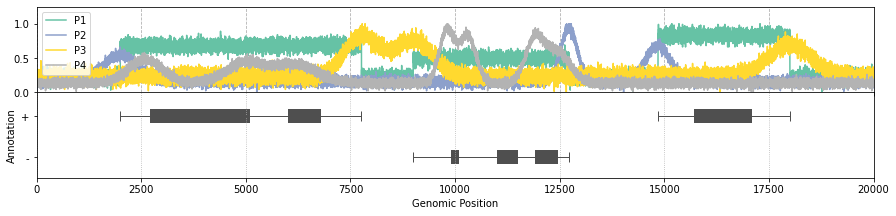

In [7]:
#set x axis range
t = np.arange(0, 20000, 1)

fig, axs = plt.subplots(2, 1, sharex=True)
#Remove horizontal space between axes
fig.set_size_inches(15,3.15)
fig.subplots_adjust(hspace=0)

#Plot 4 Protein data in a single plot
axs[0].plot(t,Protein["P1"], label = "P1", color = "#66c2a5")
axs[0].plot(t,Protein["P2"], label = "P2", color = "#8da0cb")
axs[0].plot(t,Protein["P3"], label = "P3", color = "#ffd92f")
axs[0].plot(t,Protein["P4"], label = "P4", color = "#b3b3b3")
axs[0].set_yticks(np.arange(0.0, 1.25, 0.5))           #set y-axis in incremental step points
axs[0].set_ylim(0, 1.25)                               #set y-axis limit
axs[0].xaxis.grid(linestyle='--')                      #vertical grid line style
axs[0].legend(loc='upper left', ncol=1)                #add lengend in the required format

#Plotting Genome data
#Transcript Plot
for rows in range(len(onlyTranscript)):
#check if Strand is '+' the choose y-axis setpoint for strand as 0.9 & for '-' y = 0.3    
    if onlyTranscript.iloc[rows,4] == '+':  
        y = 0.9
    elif onlyTranscript.iloc[rows,4] == '-':
        y = 0.3
    verts = [(onlyTranscript.iloc[rows,2], y), (onlyTranscript.iloc[rows,3], y)]
    xs, ys = zip(*verts)
    axs[1].plot(xs, ys, '|-', lw=1, color='#4f4f4f', ms=10)
    
axs[1].set_ylim(0, 1.25)                 # y-axis Limits
axs[1].set_xlim(0, 20000)                # x-axis Limits
axs[1].set_xlabel('Genomic Position')    # x-axis label
axs[1].set_ylabel('Annotation')          # y-axis label 2nd Plot
axs[1].set_yticks([0.3, 0.9])            # y-axis set points for strands + and -
axs[1].set_yticklabels(['-', '+'])       # y-axis labels
axs[1].xaxis.grid(linestyle=':')         # vertical grid line style

# Exon Plot
for rows in range(len(onlyExon)):
    if onlyExon.iloc[rows,4] == '+':
        y = 0.8         #set y-axis point from where the bar fills for + Strand
        height = 0.2    #set thickness of bar for 0.2 units
    elif onlyExon.iloc[rows,4] == '-':
        y = 0.2         #set y-axis point from where the bar fills for _ Strand
        height = 0.2    #set thickness of bar for 0.2 units
    axs[1].broken_barh([(onlyExon.iloc[rows,2], onlyExon.iloc[rows,5])], (y, height), facecolors='#4f4f4f')

plt.show()

### 1.4: Discussion
#### Discuss the pros and cons between the different visualization approaches.

##### *Version 1*

pros:
    
    1. As there are different subplots for each protien it is easy to identify different trends and patterns from this plot. 
    2. This plot can be used for better undertsanding of data.

cons:
    
    1. As the number of protien increases the number of subplots increases, which makes it difficult to interpret.

##### *Version 2*


pros:
    
    1. The pcolormesh plot makes more convininent to visualize our data array as cells with which we can plot boundries/edges of the cells.
    2. From the above pcolormesh we can easily identify when the signals are high and low.
    
cons:
    
    1. It is difficult to retrieve exact imformation from this plot.
    
##### *Version 3*

pros:
    
    1. All the data can be viewed in a single plot.
    2. Different colors for each of the data(in our case Protien) makes it visually beautiful.
    3. Lengends will help us to identify each type of Protien.

cons:
    
    1. As the number of input size(in our case Protien) increases it makes the plot clumsy and unclear.
    
    

## 2: Visualization Exercise 2
In this task, two additional plots shall be added to create a bigger figure. Recreate the shown figure. Note, that the bottom part of the figure is one of your solutions from the first exercise. Two additional datasets are provided:

* 10_project_data_scatter.csv contains the data needed to create the shown scatter plot
* 10_project_data_barplot.csv contains the data needed to create the shown bar plot

### Scatter Plot

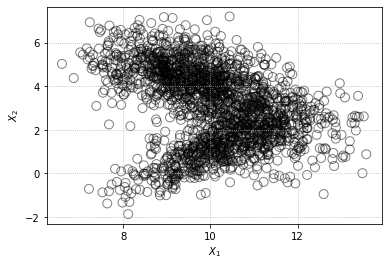

In [5]:
#Import the Scatter Plot data
ScatterPlotData = pd.read_csv('10_project_data_scatter.csv')

x1 = ScatterPlotData['x1']             #Assigning values to X-axis
x2 = ScatterPlotData['x2']             #Assigning values to Y-axis
plt.xticks(np.arange(8, 12+1, 2))      #Set X-ticks
plt.xlabel('$X_{1}$')                  #Set X-label
plt.ylabel('$X_{2}$')                  #Set Y-label
# Scatter Plot: alpha is the opacity of circles, s is the size of the circle, facecolors is the type of the scatter
plt.scatter(x1, x2, s=80, alpha=0.5, facecolors='none', edgecolors='black')
plt.grid(linestyle=':')                # Full plot adding grid with the dot line style
plt.show()

### Bar Plot

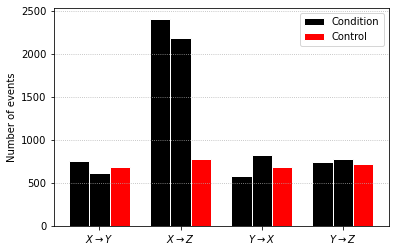

In [6]:
#Import the Bar Plot data
BarPlotData = pd.read_csv('10_project_data_barplot.csv')
 
# set width of bars
barWidth = 0.25

#Set X-ticks names using Latex render for displaying the arrow
labels = [r'$X{\rightarrow}Y$', r'$X{\rightarrow}Z$', r'$Y{\rightarrow}X$', r'$Y{\rightarrow}Z$']
# set heights of bars
bars1 = BarPlotData['condition_a_sample_1']
bars2 = BarPlotData['condition_a_sample_2']
bars3 = BarPlotData['control']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Make the plot
plt.bar(r1, bars1, color='black', width=barWidth, edgecolor='white', label='Condition')
plt.bar(r2, bars2, color='black', width=barWidth, edgecolor='white')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Control')
 
# Add X-ticks on the middle of the group bars
plt.ylabel('Number of events')
plt.xticks(r1+barWidth, labels)
plt.grid(axis='y',linestyle=':')        # Horizontal grid line style
 
# Create legend & Show graphic
plt.legend()
plt.show()

## 3: Text Exercise
### Summarize the article *'Pencil and paper'* by Wong & Kjaergaard. What are the key points? Do not copy and paste from the article. Summarize in your own words.

Visualization is way better than other constructive approaches like writing and telling it verbally. In other approaches we use words which which might cause ambiguity and that is not in the case of a picture. In simple words, a picture speaks for itself. In contrast to those tactics, the visualization and representation of data demands reasoning skills by scrutinizing our undertanding or interpretation.

Let's take the protein example in order to understand that picture is better than words. Cells contain protien which is termed as intracellular protein. There are different parts called as compartments in a cell. Explaining this verbally doesn't give you much information. Whereas, a picture can clearly tell as which intercellular compartment the protien resides. So with a picture we can clearly identify that the protein is being cytoplasmic, nuclear or associated with the nuclear membrane which is not not possible through verbal explanation.

Even though making quick drawings or doodles is a way to pictorize the things we may not match the exact picture of what we think. This leads to giving up drawing as an exercise. So to overcome this as an alternative we use the computers for generating high end graphics which will match our imagination. There are various computer softwares through which you can develop graphs, plots, models, etc. in order to visualize the data. It has been proved that drawing has been shown to improve comprehension of scientific concepts in schoolchildren.

Drawing help us challenge our working memory. With drawing we can overcome of reading or understanding the hughe amounts of data. For example, in the above exercise we used plots to get lot of insights which was unable to identify thriugh raw data. Visualization is the important part of our life in order to improve our knowledge as well as shareing the knowledge. 